In [1]:
#Heart Attack Prediction

#import modules
import numpy as np 
import pandas as pd
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


In [2]:
#import dataset heart.csv

import pandas as pd
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


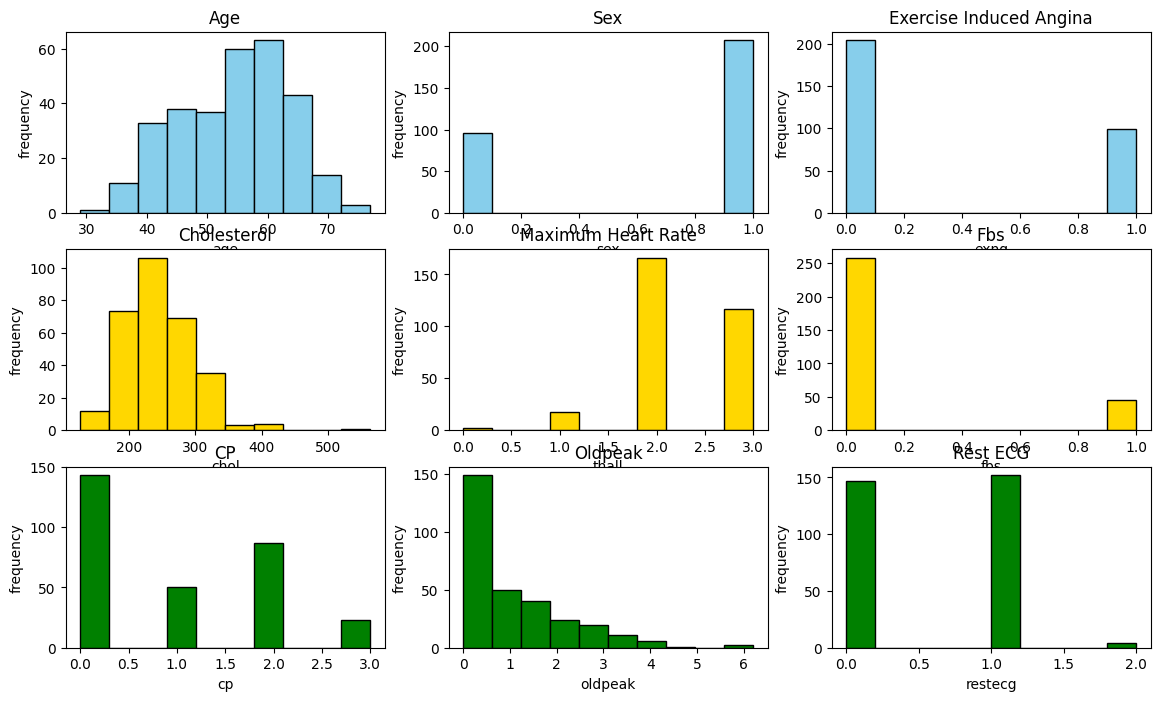

In [6]:
fig, ax= plt.subplots(3, 3, figsize=(14,8))

ax[0,0].hist(df['age'], bins=10, color='skyblue', edgecolor='black')
ax[0,0].set_xlabel('age')
ax[0,0].set_ylabel('frequency')
ax[0,0].set_title('Age')

ax[0,1].hist(df['sex'], bins=10, color='skyblue', edgecolor='black')
ax[0,1].set_xlabel('sex')
ax[0,1].set_ylabel('frequency')
ax[0,1].set_title('Sex')

ax[0,2].hist(df['exng'], bins=10, color='skyblue', edgecolor='black')
ax[0,2].set_xlabel('exng')
ax[0,2].set_ylabel('frequency')
ax[0,2].set_title('Exercise Induced Angina')

ax[1,0].hist(df['chol'], bins=10, color='gold', edgecolor='black')
ax[1,0].set_xlabel('chol')
ax[1,0].set_ylabel('frequency')
ax[1,0].set_title('Cholesterol')

ax[1,1].hist(df['thall'], bins=10, color='gold', edgecolor='black')
ax[1,1].set_xlabel('thall')
ax[1,1].set_ylabel('frequency')
ax[1,1].set_title('Maximum Heart Rate')

ax[1,2].hist(df['fbs'], bins=10, color='gold', edgecolor='black')
ax[1,2].set_xlabel('fbs')
ax[1,2].set_ylabel('frequency')
ax[1,2].set_title('Fbs')

ax[2,0].hist(df['cp'], bins=10, color='green', edgecolor='black')
ax[2,0].set_xlabel('cp')
ax[2,0].set_ylabel('frequency')
ax[2,0].set_title('CP')

ax[2,1].hist(df['oldpeak'], bins=10, color='green', edgecolor='black')
ax[2,1].set_xlabel('oldpeak')
ax[2,1].set_ylabel('frequency')
ax[2,1].set_title('Oldpeak')

ax[2,2].hist(df['restecg'], bins=10, color='green', edgecolor='black')
ax[2,2].set_xlabel('restecg')
ax[2,2].set_ylabel('frequency')
ax[2,2].set_title('Rest ECG')



plt.show()

<Axes: xlabel='age', ylabel='trtbps'>

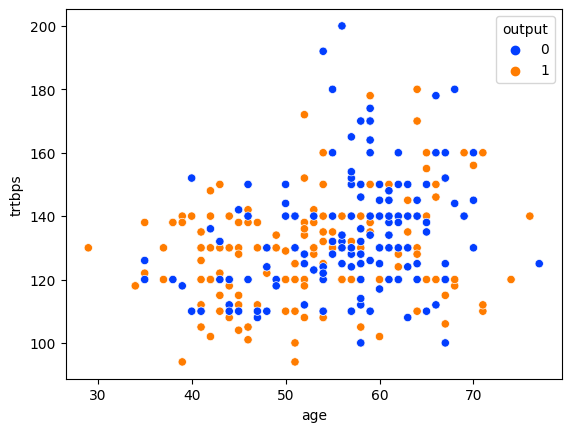

In [7]:
y=df['output']
sns.scatterplot(data= df, x='age', y='trtbps', hue=y, palette="bright")

In [8]:
#From the scatter plot of age and target column, it shows that there is tendency for people across the age to get heart attack 
#but more prone to occurs in the age of 40 to 70.

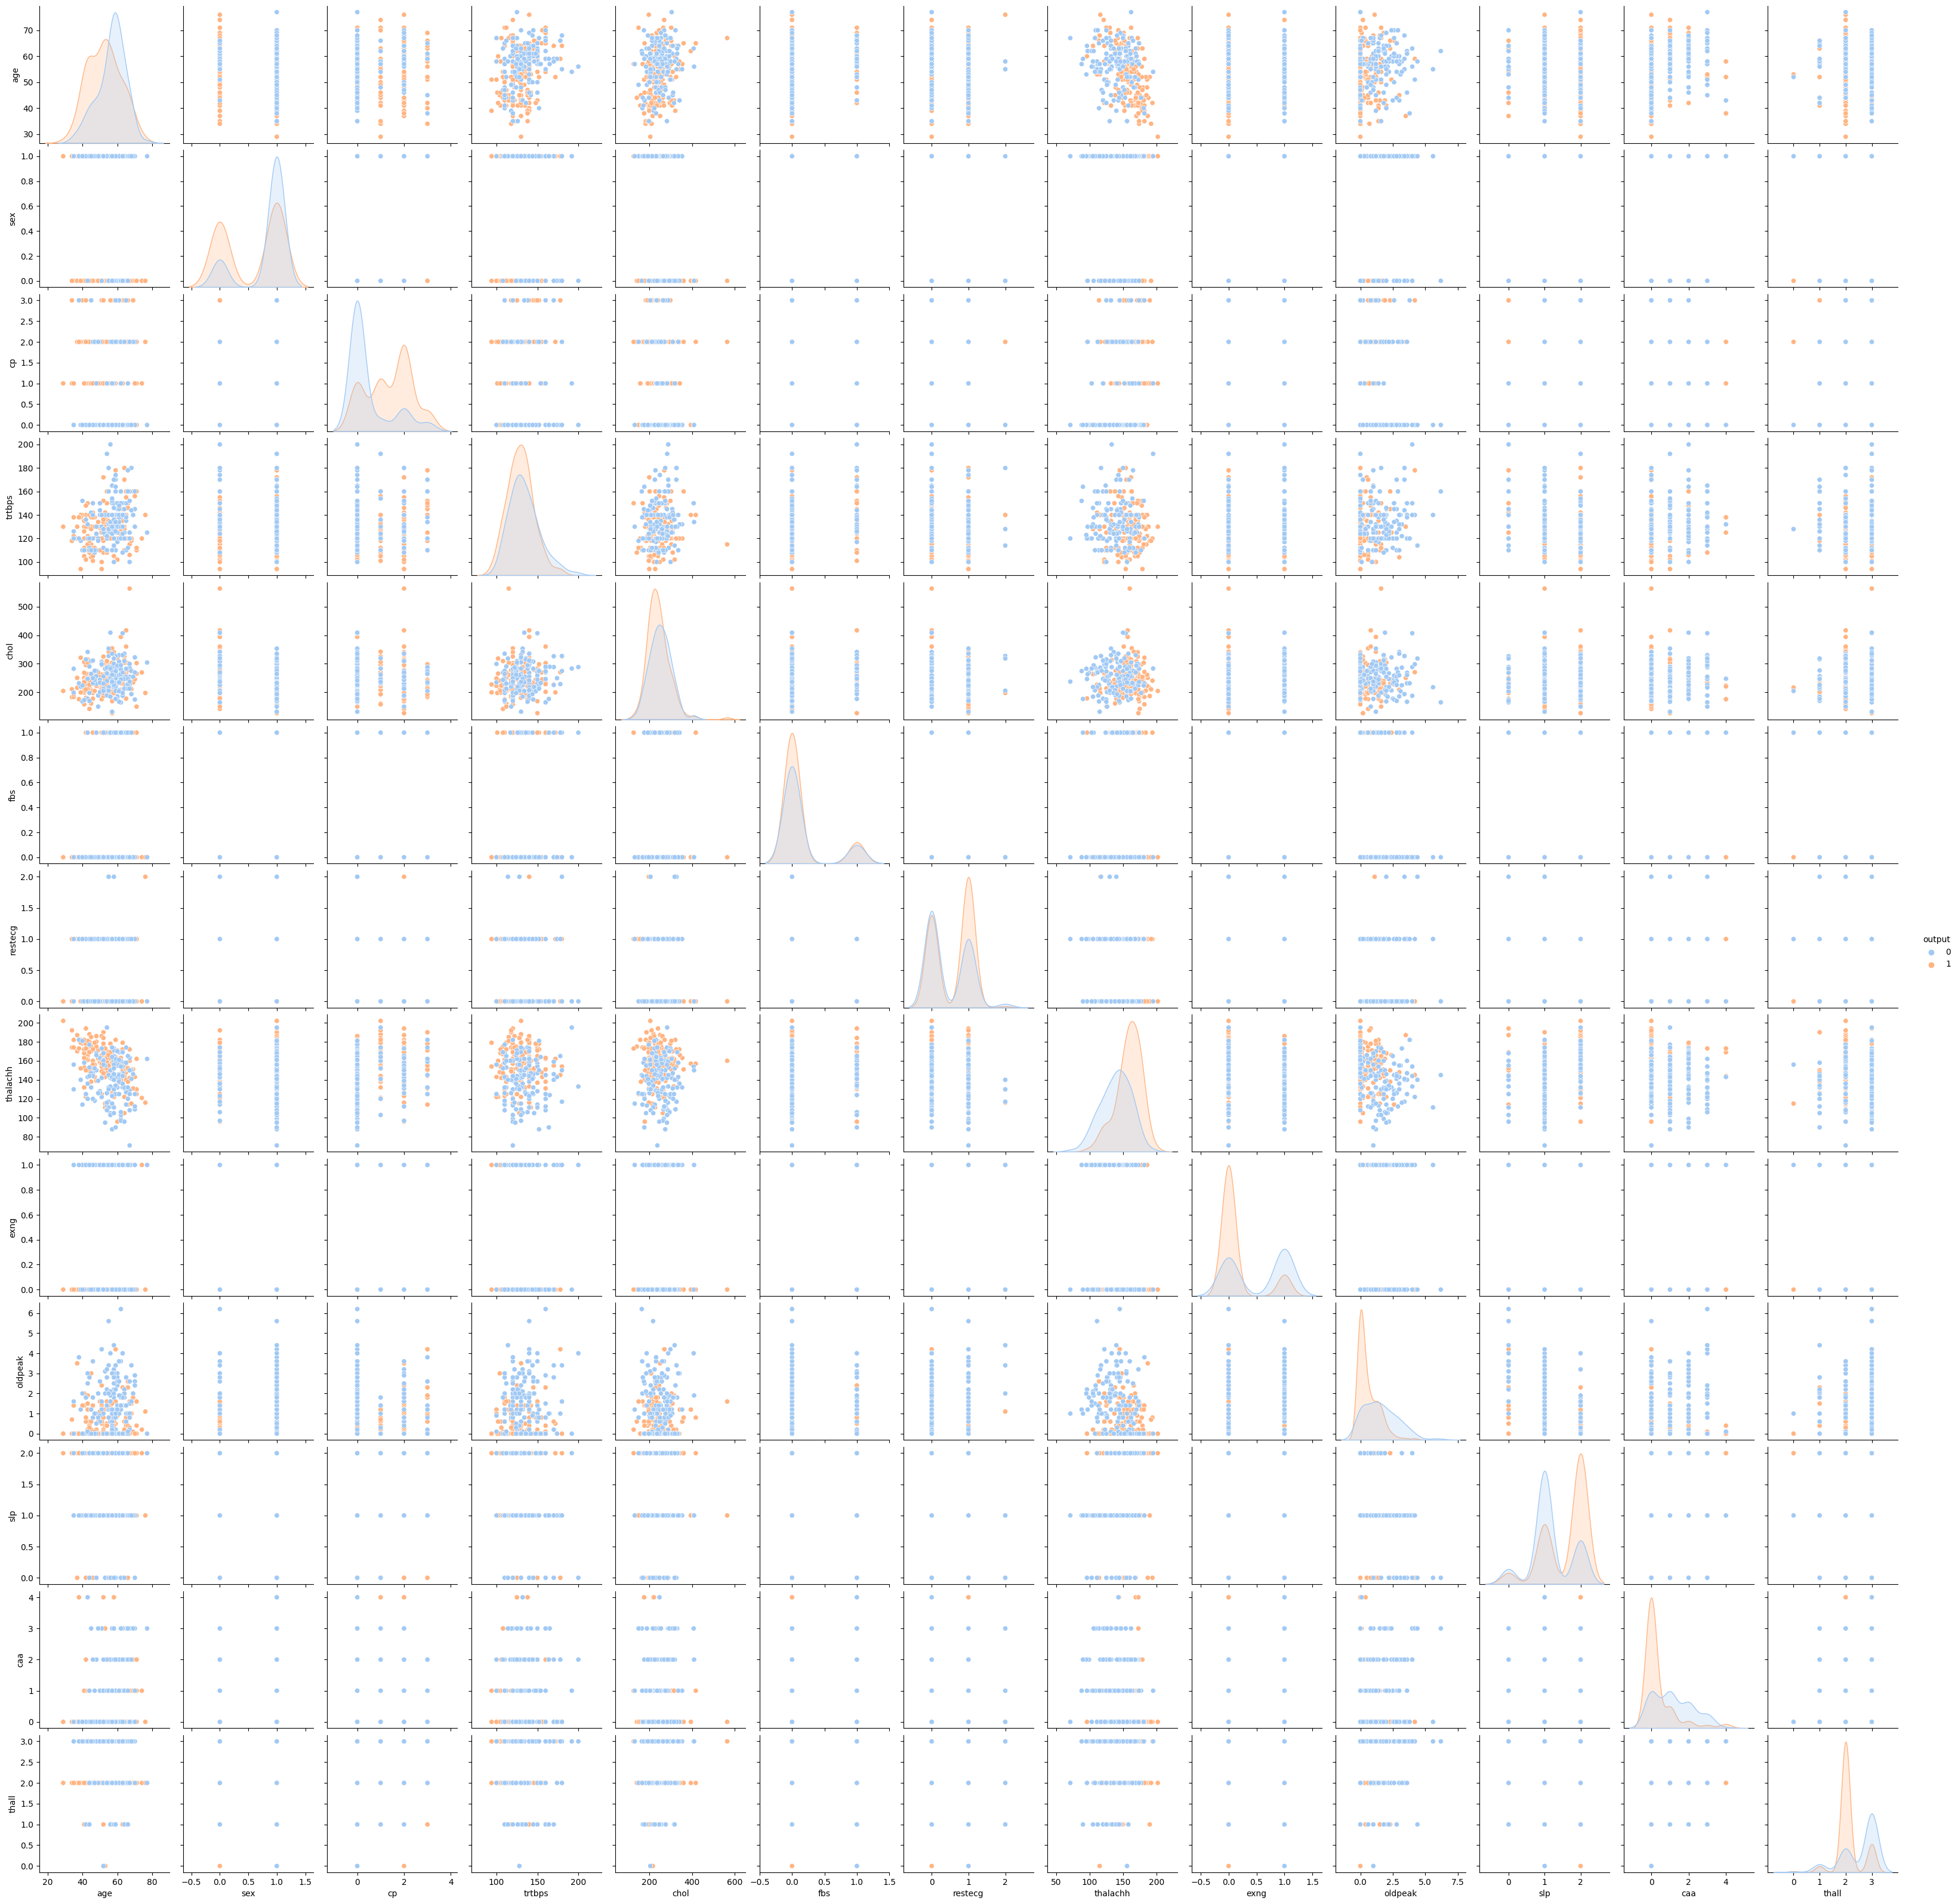

In [9]:
df['output'] = y
sns.pairplot(df, hue='output', palette="pastel")
plt.show()

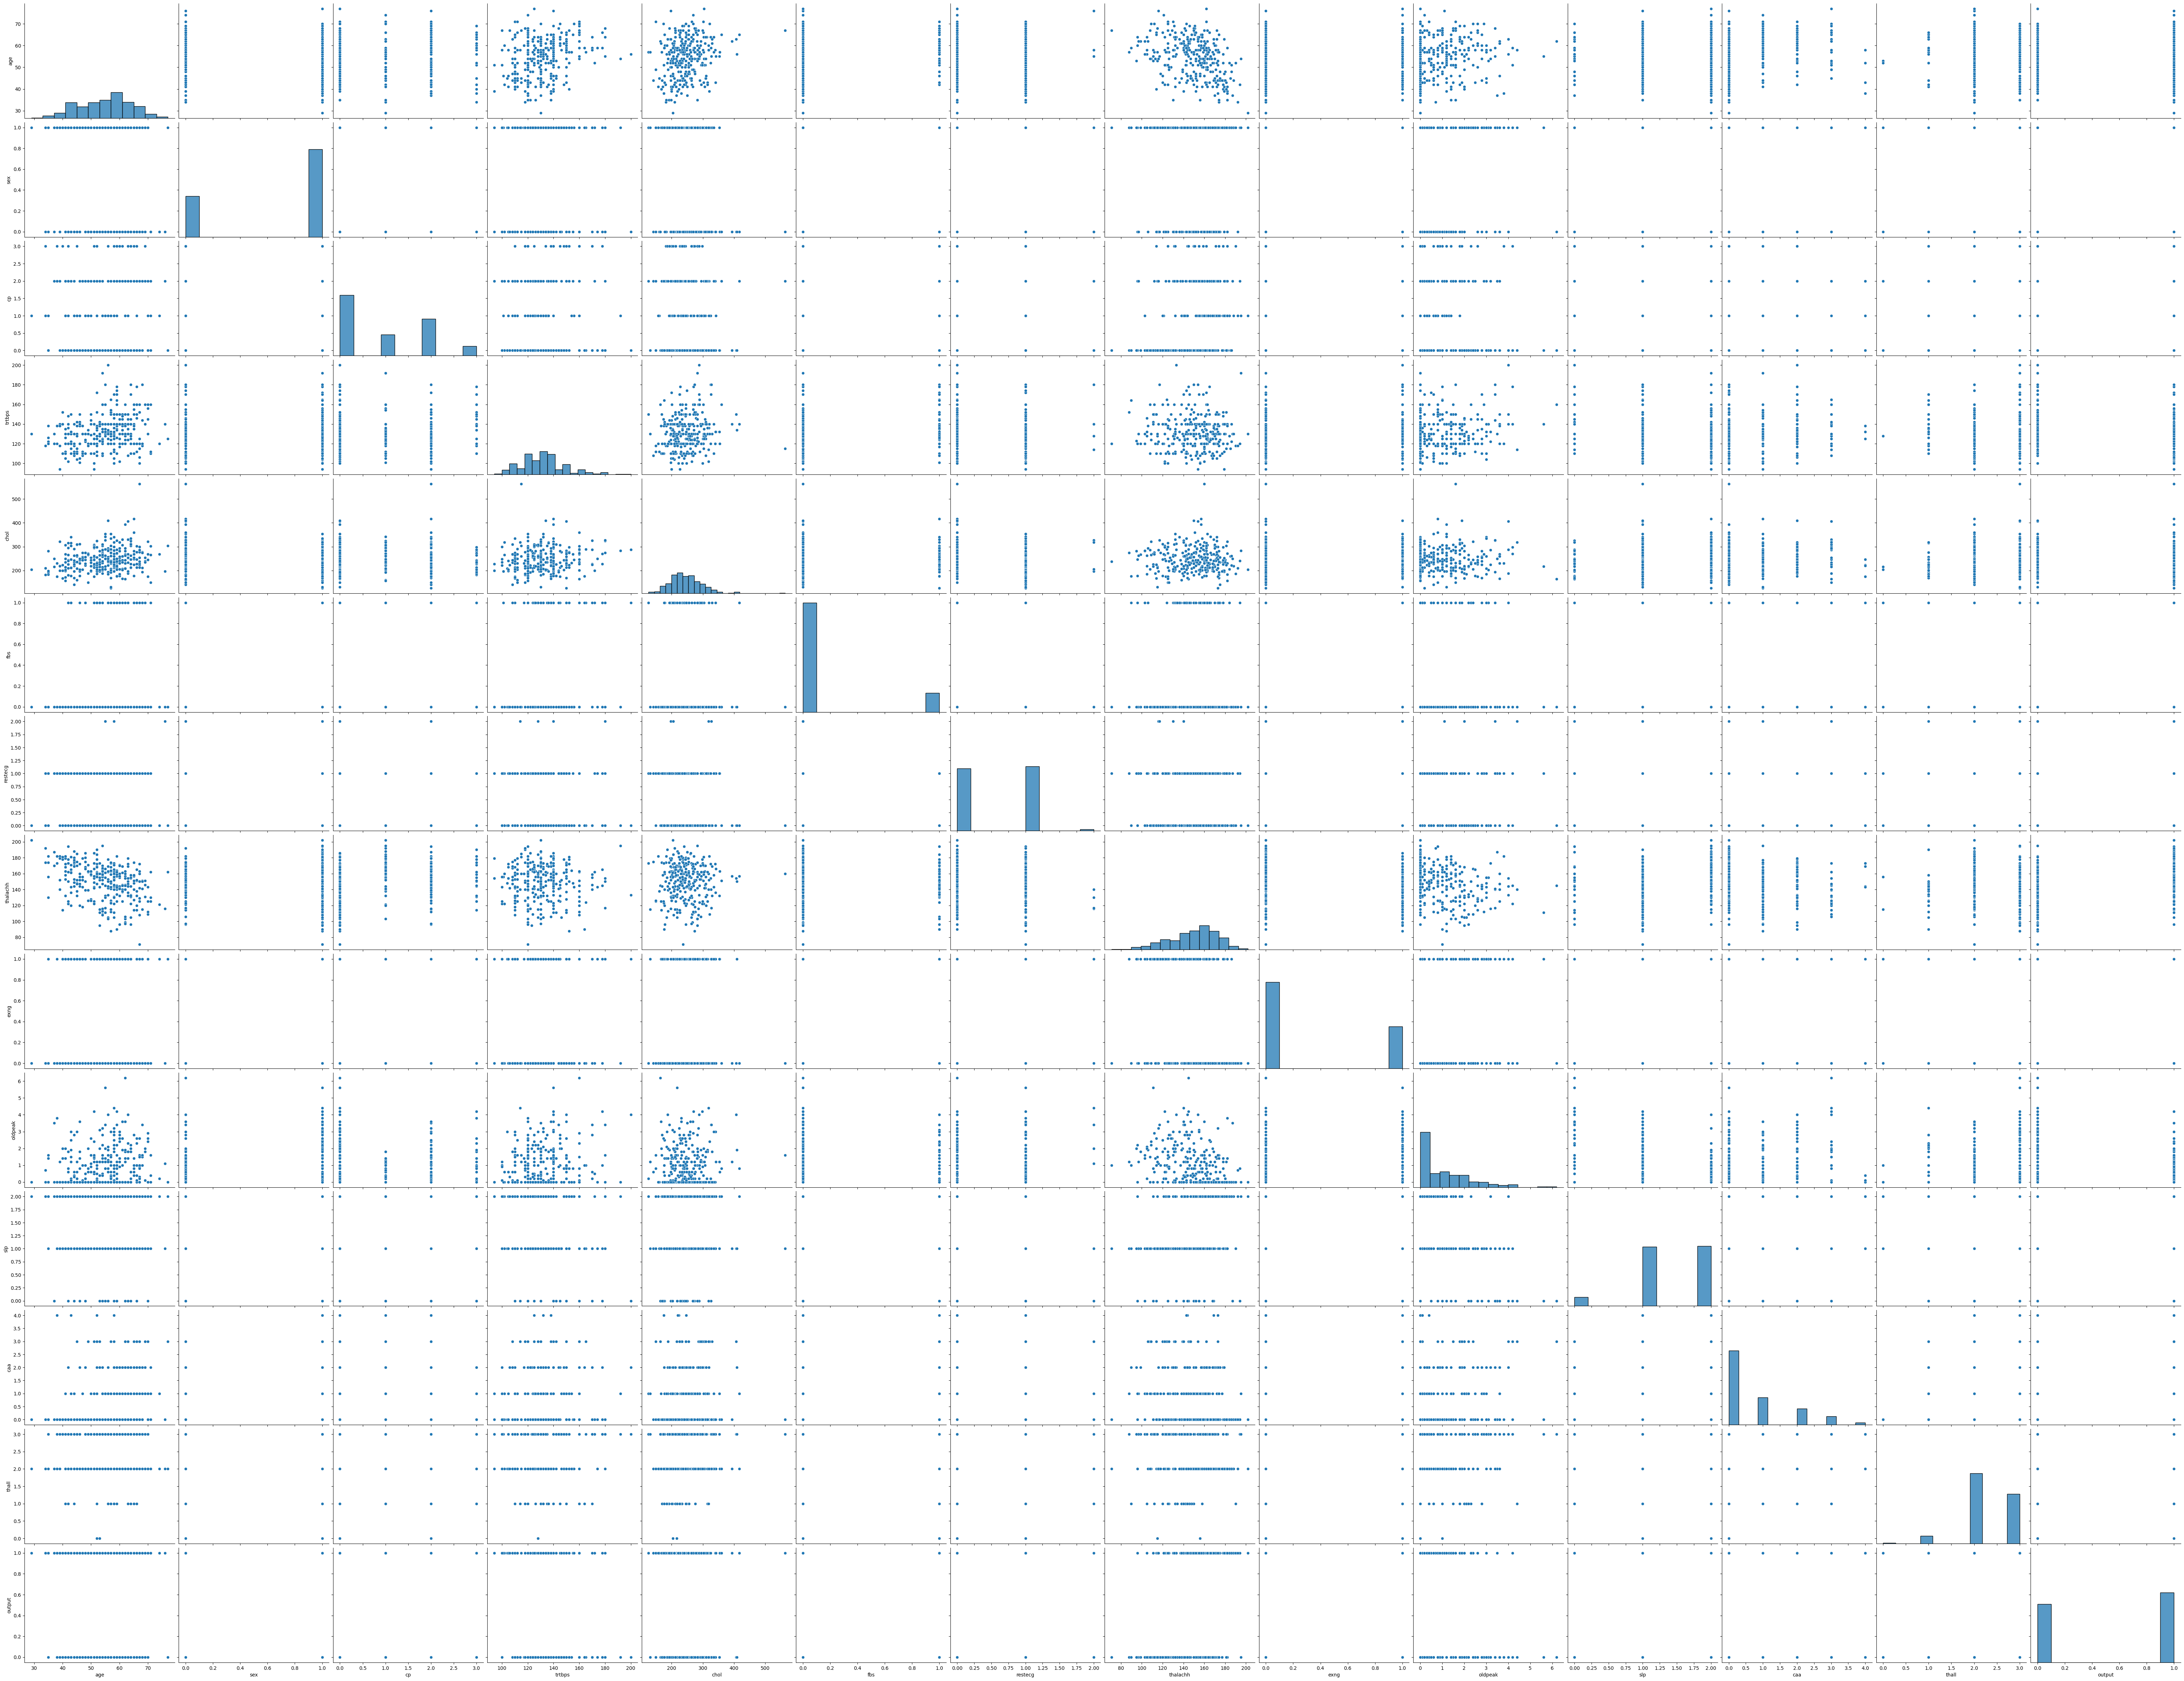

In [10]:
sns.pairplot(df, height=3.5, aspect=1.3)
plt.show()

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

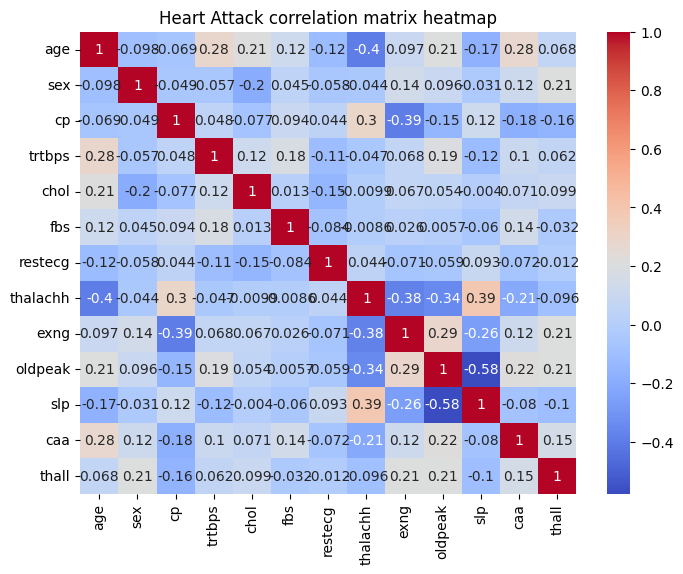

In [11]:
df_copy = df.drop('output', axis=1)
corr = df_copy.corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heart Attack correlation matrix heatmap")
plt.show()

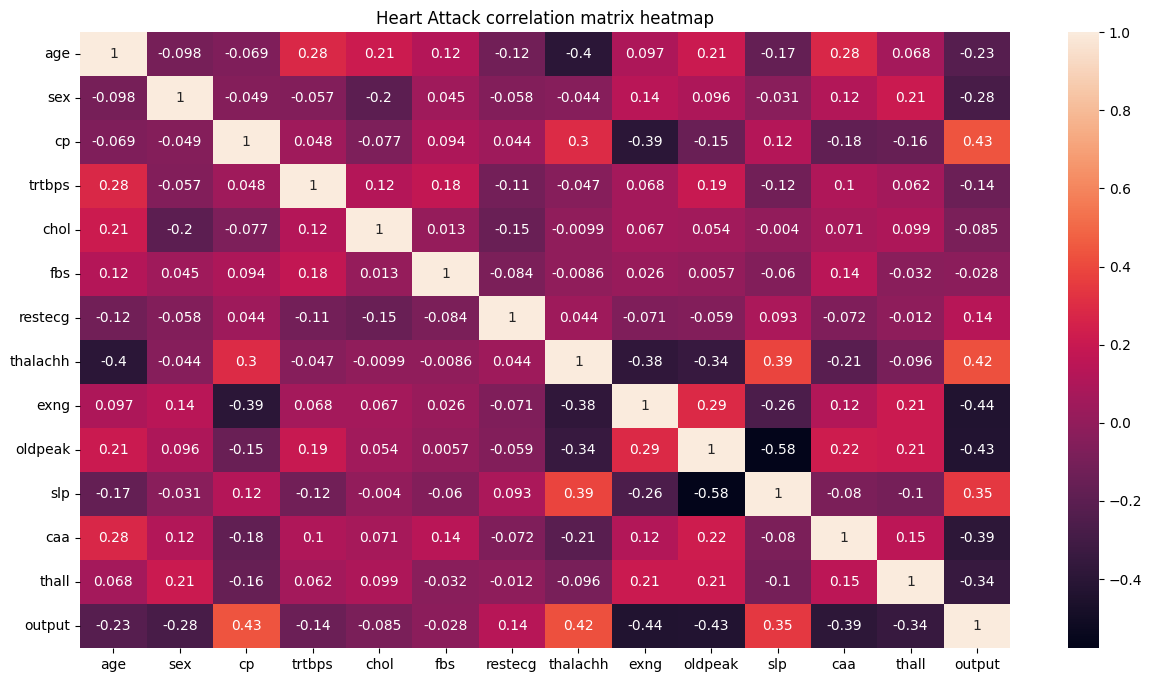

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heart Attack correlation matrix heatmap")
plt.show()

In [13]:
#From the correlation heatmap, the age, cp, oldpeak, slp, thalachh has a highest coleration with the target class and 
#can considered as the importance feature to be included during modeling phase.

<Axes: >

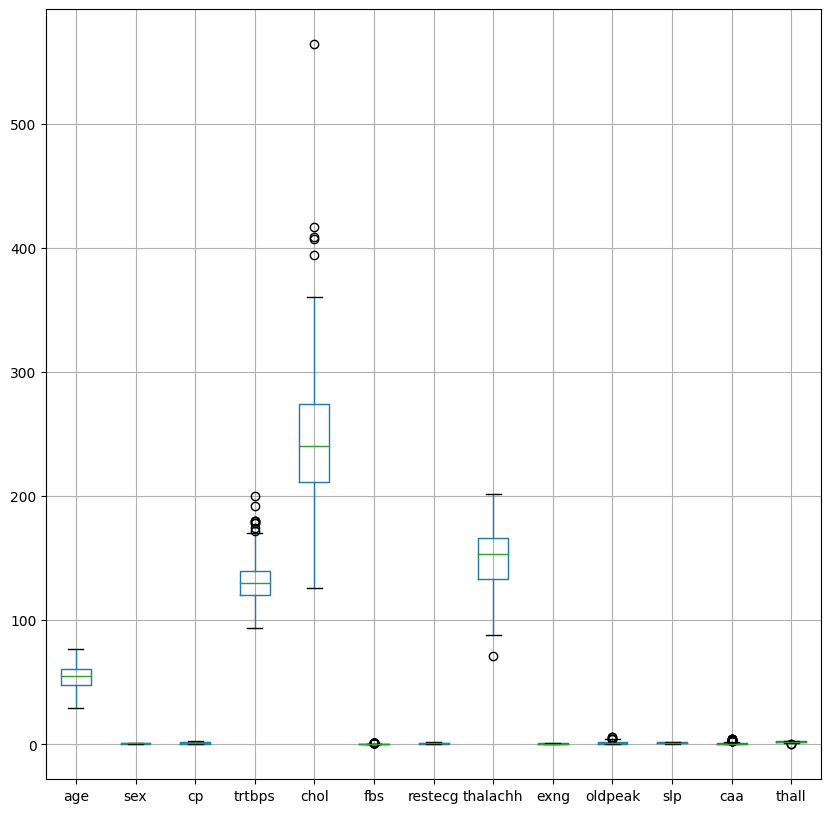

In [14]:
plt.figure(figsize=(10,10))
df_copy.boxplot()

In [15]:
#From the box plot, there are actually many outliers can be found from columns trtbps (resting blood pressure), and chol (cholesterol).
#Data imputation technique can be used to reduce the outliers.

In [16]:
df.duplicated().any()


True

In [17]:
df.duplicated().sum()


1

In [18]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [21]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [23]:
#recheck if duplicates is already removed
df.duplicated().sum()

0

In [24]:
X= df.drop('output', axis=1)

In [25]:
X = df.drop(['output'], axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y.value_counts()


output
1    164
0    138
Name: count, dtype: int64

In [26]:
MMS = MinMaxScaler()
SS = StandardScaler()
KNN = KNeighborsClassifier()
LR = LogisticRegression()
SVM = SVC()
DT = DecisionTreeClassifier()
 
pipelines = {  
               'mms+knn'   :     Pipeline(  [ ('MMS',MMS) , ('KNN', KNN) ]),
               'ss+knn'    :     Pipeline(  [ ('SS',SS) , ('KNN', KNN) ]),
               'mms+lr'    :     Pipeline(  [ ('MMS',MMS) , ('LR', LR) ]),
               'ss+lr'     :     Pipeline(  [ ('SS',SS) , ('LR', LR) ]),
 
               'mms+svm'   :     Pipeline(  [ ('MMS',MMS) , ('SVM', SVM) ]),
               'ss+svm'    :     Pipeline(  [ ('SS',SS) , ('SVM', SVM) ]),
               'mms+dt'    :     Pipeline(  [ ('MMS',MMS) , ('DT', DT) ]),
               'ss+dt'     :     Pipeline(  [ ('SS',SS) , ('DT', DT) ]),
            }
 
param_grids = { 'mms+knn' : { 'KNN__n_neighbors' :[1,3,5,7,9],
                              'KNN__weights' :['uniform','distance'],
                              'KNN__metric' : ['euclidean','manhattan']},
 
                'ss+knn' : { 'KNN__n_neighbors' :[1,3,5,7,9],
                              'KNN__weights' :['uniform','distance'],
                              'KNN__metric' : ['euclidean','manhattan']},
 
                'mms+lr' : {  "LR__C" : [0.1,1,10],
                              "LR__solver" :['lbfgs','liblinear']    },
 
                'ss+lr' :  {  "LR__C" : [0.1,1,10],
                              "LR__solver" :['lbfgs','liblinear']    },
 
                "mms+svm" : { "SVM__C" :[0.1,1,10],
                              "SVM__gamma": [1,0.1,0.01],
                              "SVM__kernel": ['rbf','linear'],},
 
                "ss+svm" : { "SVM__C" :[0.1,1,10],
                              "SVM__gamma": [1,0.1,0.01],
                              "SVM__kernel": ['rbf','linear'],},
 
                "mms+dt"  : { "DT__max_depth" : [2,4,6,8],
                             "DT__min_samples_split": [2,5,10]},
 
                "ss+dt"  : { "DT__max_depth" : [2,4,6,8],
                             "DT__min_samples_split": [2,5,10] },
 
                 
                }

performance_list=[]

for steps in pipelines.keys():
    GS= GridSearchCV(pipelines[steps], param_grid = param_grids[steps], cv=5)
    GS.fit(X_train, y_train)
    y_predict=GS.predict(X_test)
    test_score = GS.score(X_test, y_test)
    #test_score = metrics.accuracy_score(y_test, y_predict)
    print(f"The accuracy score for {steps}: {test_score:.4f}: with the best parameters:{str(GS.best_params_)}\n")

    performance_list.append({
    'Pipeline': steps,
    'Accuracy Score': test_score,
    'Best Parameters' : str(GS.best_params_)
    })

The accuracy score for mms+knn: 0.8852: with the best parameters:{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}

The accuracy score for ss+knn: 0.8852: with the best parameters:{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}

The accuracy score for mms+lr: 0.8197: with the best parameters:{'LR__C': 10, 'LR__solver': 'lbfgs'}

The accuracy score for ss+lr: 0.8361: with the best parameters:{'LR__C': 0.1, 'LR__solver': 'liblinear'}

The accuracy score for mms+svm: 0.8361: with the best parameters:{'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}

The accuracy score for ss+svm: 0.8197: with the best parameters:{'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}

The accuracy score for mms+dt: 0.8033: with the best parameters:{'DT__max_depth': 4, 'DT__min_samples_split': 2}

The accuracy score for ss+dt: 0.7705: with the best parameters:{'DT__max_depth': 6, 'DT__min_samples_split': 5}



In [27]:
pipelines.keys()

dict_keys(['mms+knn', 'ss+knn', 'mms+lr', 'ss+lr', 'mms+svm', 'ss+svm', 'mms+dt', 'ss+dt'])

In [28]:
performance_df= pd.DataFrame(performance_list)
performance_df.sort_values(by= "Accuracy Score", ascending= False).style.background_gradient(cmap = "Oranges")

,Pipeline,Accuracy Score,Best Parameters
0,mms+knn,0.885246,"{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}"
1,ss+knn,0.885246,"{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}"
3,ss+lr,0.836066,"{'LR__C': 0.1, 'LR__solver': 'liblinear'}"
4,mms+svm,0.836066,"{'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}"
2,mms+lr,0.819672,"{'LR__C': 10, 'LR__solver': 'lbfgs'}"
5,ss+svm,0.819672,"{'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}"
6,mms+dt,0.803279,"{'DT__max_depth': 4, 'DT__min_samples_split': 2}"
7,ss+dt,0.770492,"{'DT__max_depth': 6, 'DT__min_samples_split': 5}"


In [31]:
#Conclusion:
#The best model prediction is knn using Min Max Scaler or Standard Scaler with the Accuracy Score of 89% when the knn is set with parameters of 
#metric= manhattan, n_neighbors=5 or 7, and weights=uniform.

#Note that lower test size can improved accurancy score.